In [1]:
#Importando as bibliotecas
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io as sc
import pandas as pd
import pymatreader as pytomat
from pymatreader import read_mat

In [2]:
#Comando para leitura de dados .mat mas que não funciona com os dados de acelerôemtro (OBSOLETA)
# mat = sc.loadmat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4306\\gps_data\\25126_20151210_3_2_7_2gps.mat')
# mat['save_var_gps']
# df_teste = pd.DataFrame(mat['save_var_gps'])

In [3]:
#Visualizando os dados do acelerômetro

dataacer = read_mat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4306\\accelerometer_data\\39_20131121_1_1_5_1_3.mat')
pd.DataFrame(dataacer)

,save_var
0,0.313770
1,0.123914
2,0.009619
3,0.170537
4,0.132229
...,...
865442,0.172725
865443,0.127627
865444,0.201840
865445,0.342721


In [4]:
#Comando para criação de dataframe com os dados de GPS
datagps = read_mat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4313\\gps_data\\409_20150618_3_1_5_2gps.mat')
pd.DataFrame(datagps['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])

,Longitude,Latitude,Altitude,Velocity,Time_Stamp
0,-80.019933,40.365635,323.4,49.6,736126.952870
1,-80.019770,40.365652,323.2,48.6,736126.952882
2,-80.019610,40.365668,323.0,49.6,736126.952894
3,-80.019450,40.365682,322.9,48.9,736126.952905
4,-80.019297,40.365697,322.3,47.0,736126.952917
...,...,...,...,...,...
537,-80.002412,40.406373,302.2,63.9,736126.959086
538,-80.002515,40.406512,302.7,65.4,736126.959097
539,-80.002613,40.406648,303.3,62.0,736126.959109
540,-80.002700,40.406785,303.8,61.3,736126.959120


In [5]:
#Comando para listar arquivos do diretório
print(os.listdir('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train' ))
#\\ground_truth_rail_layout_GPS

['regions.fig', 'README.txt', 'regions.pdf', 'code', 'ground_truth_rail_layout_GPS', 'LRV4306', 'LRV4313', 'track_maintenance_logs', 'README_updated.txt']


In [6]:
#comando do Samuel para listar os arquivos da região 5
# diretory=['LRV4306\\accelerometer_data','LRV4306\\gps_data','LRV4313\\gps_data','LRV4313\\accelerometer_data']
# for i in range(0, len(diretory)-1):
#    files=os.listdir('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\'+diretory[3])
#    for j in range(0,len(files)-1):
#        name=files[j].split("_")
#        if name[4]=='5' and name != 'desktop.ini':
#            print(name)

In [7]:
#Criando o Dataframe global com os dados de acelerômetro
trem = ['LRV4306','LRV4313']
path = 'G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\'
df_global = pd.DataFrame()

diretory=['LRV4306\\accelerometer_data', 'LRV4313\\accelerometer_data']
for i in range(0, len(diretory)):
    files=os.listdir(path+diretory[i])
    for j in range(0,len(files)-1):
        name=files[j].split("_")
        if name[4]=='5' and name != 'desktop.ini':
            file = int(name[0])
            date = int(name[1])
            root_index = int(name[2])
            daily_passing = int(name[3])
            region = int(name[4])
            running_direction = int(name[5])
            accelerometer = int(name[6].split(".mat")[0])
            arquivo = diretory[i]+'\\'+files[j]
            identidade = str(date) + '_' +str(root_index)+ '_' +str(daily_passing) +'_'+str(region)+'_'+str(running_direction)
            df_global = pd.concat([df_global, pd.DataFrame({'trem': [trem[i]], 'file': [file], 'date': [date],'root_index': [root_index],
                     'daily_passing': [daily_passing], 'region': [region], 'running_direction': [running_direction], 'accelerometer': accelerometer, 'arquivo': arquivo, 'identidade': identidade})], ignore_index = True)

In [8]:
#acrescentando os dados de GPS também, mas colocando valor negativo na posição do acelerômetro pra representar valor nulo
accelerometer = -1
#df_global = pd.DataFrame()

diretory=['LRV4306\\gps_data','LRV4313\\gps_data']
for i in range(0, len(diretory)):
    files=os.listdir(path+diretory[i])
    for j in range(0,len(files)-1):
        name=files[j].split("_")
        if name[4]=='5' and name != 'desktop.ini':
            file = int(name[0])
            date = int(name[1])
            root_index = int(name[2])
            daily_passing = int(name[3])
            region = int(name[4])
            running_direction = int(name[5].split("gps")[0])
            arquivo = diretory[i]+'\\'+files[j]
            identidade = str(date) + '_' +str(root_index)+ '_' +str(daily_passing) +'_'+str(region)+'_'+str(running_direction)
            df_global = pd.concat([df_global, pd.DataFrame({'trem': [trem[i]], 'file': [file], 'date': [date],'root_index': [root_index],
                     'daily_passing': [daily_passing], 'region': [region], 'running_direction': [running_direction], 'accelerometer': accelerometer, 'arquivo': arquivo, 'identidade': identidade})], ignore_index = True)

In [9]:
df_global=df_global.sort_values(by=['file']).reset_index(drop=True)
df_global=df_global.loc[(df_global.trem=='LRV4306') & (df_global.running_direction==1) & (df_global.accelerometer<6)]

In [10]:
df_global.loc[df_global.accelerometer == -1]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
45,LRV4306,136,20131121,5,1,5,1,-1,LRV4306\gps_data\136_20131121_5_1_5_1gps.mat,20131121_5_1_5_1
74,LRV4306,201,20131227,4,1,5,1,-1,LRV4306\gps_data\201_20131227_4_1_5_1gps.mat,20131227_4_1_5_1
120,LRV4306,266,20131227,4,2,5,1,-1,LRV4306\gps_data\266_20131227_4_2_5_1gps.mat,20131227_4_2_5_1
166,LRV4306,346,20131227,6,1,5,1,-1,LRV4306\gps_data\346_20131227_6_1_5_1gps.mat,20131227_6_1_5_1
...,...,...,...,...,...,...,...,...,...,...
5643,LRV4306,29856,20160505,3,6,5,1,-1,LRV4306\gps_data\29856_20160505_3_6_5_1gps.mat,20160505_3_6_5_1
5645,LRV4306,29901,20160519,1,1,5,1,-1,LRV4306\gps_data\29901_20160519_1_1_5_1gps.mat,20160519_1_1_5_1
5647,LRV4306,29961,20160519,1,2,5,1,-1,LRV4306\gps_data\29961_20160519_1_2_5_1gps.mat,20160519_1_2_5_1
5649,LRV4306,30016,20160519,2,1,5,1,-1,LRV4306\gps_data\30016_20160519_2_1_5_1gps.mat,20160519_2_1_5_1


2 12
23 14
4 17
14 21
6 27
18 38
15 76
39 109
9 118
15 119
2 142
9 163
30 202
31 220
2 263
26 267
35 268
31 271
2 284
4 287
2 308


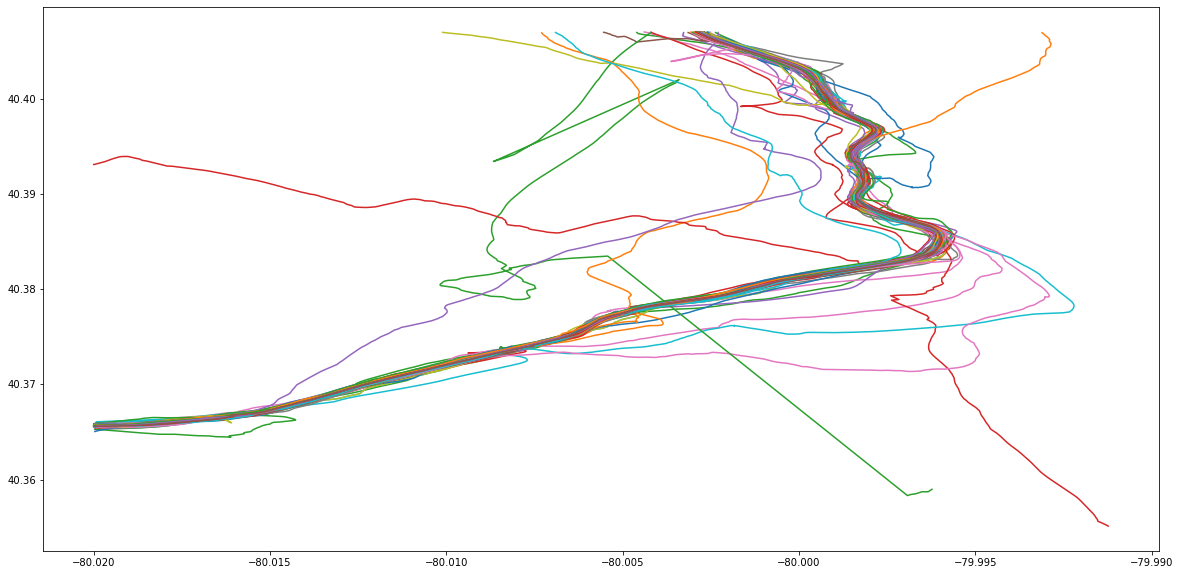

<Figure size 1440x720 with 0 Axes>

In [11]:
for j in [1,2]:
    aux = df_global.loc[(df_global['trem'] == 'LRV4306') & (df_global['accelerometer'] == -1)
                                 & (df_global['running_direction'] == j)].reset_index(drop=True)

    plt.figure(figsize=[20,10])
    x = pd.DataFrame()
    y = pd.DataFrame()

    for i in range(0, len(aux)):
        #print(aux[i])
        df_gps = pd.DataFrame(read_mat(path+aux.arquivo[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
        x = df_gps.Longitude
        y = df_gps.Latitude
        if(len(x) < 75 or len(y) < 75):
            print(str(len(x)) + ' ' + str(i))
            df_global.drop(df_global[df_global.identidade == aux.identidade[i]].index,  inplace=True)
        else:
            plt.plot(x,y)

### Observações sobre dados de GPS:

##### Os dados de GPS (e provavelmente o de acelerômetro também) não possuem a mesma quantidade de linhas, de modo que a comparação da posição 10 de longitude e latitude de arquivos diferentes, por exemplo, não necessariamente correspondem a mesma posição. Desse modo, a aquisição do trajeto por meio de simples artifícios estatísticos como média, mediana e moda não funcionam.

##### Um outro ponto é que alguns dados de gps (e provavelmente pode ocorrer com o de acelerômetro também) possuem poucos registros, por exemplo dois pontos apenas de longitude e latitude. Essa falta de dados torna inutilizável o arquivo. Sendo assim, estes devem ser excluídos. Por coincidência, alguns desses são outliers. Mas ainda há outliers a serem tratados.

###### Dica: Analisar dados outbound separados do inbound a priori.

Removendo arquivos que não apresentam todos os sensores de acelerômetros

In [12]:
aux = df_global.loc[(df_global['trem'] == 'LRV4306') & (df_global['accelerometer'] == -1)
                        & (df_global['running_direction'] == 1)].reset_index(drop=True)
count=0
for i in range(0,len(aux)):
    if len(df_global[df_global.identidade == aux.identidade[i]])<6:
        print(aux.identidade[i])
        df_global.drop(df_global[df_global.identidade == aux.identidade[i]].index,  inplace=True)
        count=count+1
count

20140411_7_1_5_1
20140418_2_1_5_1
20140418_3_1_5_1
20140418_9_2_5_1
20160121_9_2_5_1
20160128_2_1_5_1
20160128_2_2_5_1
20160128_4_1_5_1
20160128_4_2_5_1
20160128_4_3_5_1
20160324_1_1_5_1
20160324_1_2_5_1
20160324_7_1_5_1
20160324_7_2_5_1
20160324_8_1_5_1
20160324_8_2_5_1
20160324_8_3_5_1
20160408_6_1_5_1
20160408_6_2_5_1
20160414_5_1_5_1
20160414_5_2_5_1
20160414_5_3_5_1
20160414_5_4_5_1
20160414_5_5_5_1
20160414_5_6_5_1
20160414_6_1_5_1
20160414_6_2_5_1
20160505_2_1_5_1
20160505_2_2_5_1
20160505_2_3_5_1
20160505_2_4_5_1
20160505_3_1_5_1
20160505_3_3_5_1
20160505_3_4_5_1
20160505_3_5_5_1
20160505_3_6_5_1
20160519_1_1_5_1
20160519_1_2_5_1
20160519_2_1_5_1
20160519_2_2_5_1


40

In [13]:
df_global.loc[df_global.accelerometer == -1].sort_values('date').reset_index(drop=True)

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
1,LRV4306,136,20131121,5,1,5,1,-1,LRV4306\gps_data\136_20131121_5_1_5_1gps.mat,20131121_5_1_5_1
2,LRV4306,201,20131227,4,1,5,1,-1,LRV4306\gps_data\201_20131227_4_1_5_1gps.mat,20131227_4_1_5_1
3,LRV4306,266,20131227,4,2,5,1,-1,LRV4306\gps_data\266_20131227_4_2_5_1gps.mat,20131227_4_2_5_1
4,LRV4306,346,20131227,6,1,5,1,-1,LRV4306\gps_data\346_20131227_6_1_5_1gps.mat,20131227_6_1_5_1
...,...,...,...,...,...,...,...,...,...,...
246,LRV4306,26916,20160114,8,1,5,1,-1,LRV4306\gps_data\26916_20160114_8_1_5_1gps.mat,20160114_8_1_5_1
247,LRV4306,27301,20160114,3,2,5,1,-1,LRV4306\gps_data\27301_20160114_3_2_5_1gps.mat,20160114_3_2_5_1
248,LRV4306,26771,20160114,7,1,5,1,-1,LRV4306\gps_data\26771_20160114_7_1_5_1gps.mat,20160114_7_1_5_1
249,LRV4306,26831,20160114,7,2,5,1,-1,LRV4306\gps_data\26831_20160114_7_2_5_1gps.mat,20160114_7_2_5_1


Alinhando os dados de GPS

In [14]:
from dtwalign import dtw

In [15]:
df_gps_inbound = pd.read_csv('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\ground_truth_rail_layout_GPS\\region5_inbound.csv', sep=',',
                         names=['dist', 'latit', 'longit'])


df_gps_outbound = pd.read_csv('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\ground_truth_rail_layout_GPS\\region5_outbound.csv', sep=',',
                         names=['dist', 'latit', 'longit'])

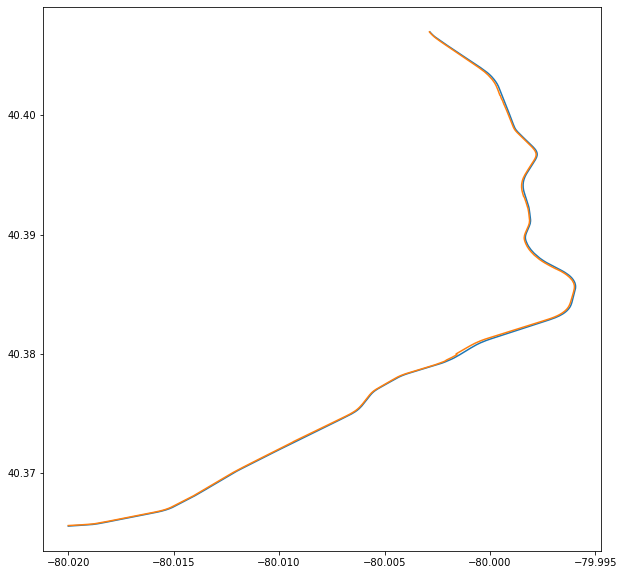

In [16]:
#Verificando inbound e outbound
x_in = df_gps_inbound.longit
y_in = df_gps_inbound.latit
x_out = df_gps_outbound.longit
y_out = df_gps_outbound.latit
plt.figure(figsize=[10,10])
plt.plot(x_in,y_in)
plt.plot(x_out,y_out)

In [17]:
#GPS=pd.DataFrame(read_mat(path+df_global.arquivo[4821])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
#plt.plot(GPS.Longitude,GPS.Latitude)

# resx = dtw(GPS.Longitude, x_out)
# resy = dtw(GPS.Latitude, y_out)
# resx.distance
# resy.distance

# x_warping_path = resx.get_warping_path(target="query")
# x_warping_path

In [18]:
# plt.plot(GPS.Longitude[resx.get_warping_path(target="query")],GPS.Latitude[resy.get_warping_path(target="query")], label="aligned")
# #plt.plot(x_out,y_out, label='Referencia')
# plt.plot(GPS.Longitude,GPS.Latitude, label='GPS')
# plt.plot(x_out,y_out, label='Gabarito')
# #plt.plot(resx.get_warping_path(target="query"), y_out, label='Ajuste')
# plt.legend()

In [19]:
distance=[]
aux = df_global.loc[(df_global['trem'] == 'LRV4306') & (df_global['accelerometer'] == -1)
                        & (df_global['running_direction'] == 1)].reset_index(drop=True)

for i in range(0, len(aux)):
    df_gps = pd.DataFrame(read_mat(path+aux.arquivo[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
    resx = dtw(df_gps.Longitude, x_out).distance
    resy = dtw(df_gps.Latitude, y_out).distance
    distance.append((resx**2+resy**2)**0.5)
    

C:\ProgramData\Anaconda3\lib\site-packages\dtwalign\dtw.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if x.ndim == 1: x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\dtwalign\dtw.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if x.ndim == 1: x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprec

In [20]:
#plt.plot(GPS.Longitude[resx.get_warping_path(target="query")],GPS.Latitude[resy.get_warping_path(target="query")])

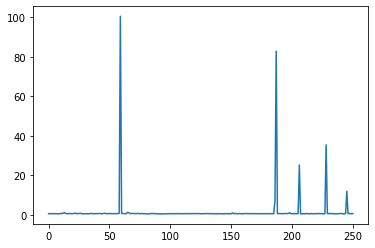

In [21]:
plt.plot(distance) 

In [22]:
for i in range(0,len(distance)):
    if distance[i]>10:
        print(aux.arquivo[i])
        df_global.drop(df_global[df_global.identidade == aux.identidade[i]].index,  inplace=True)


LRV4306\gps_data\9036_20140711_4_2_5_1gps.mat
LRV4306\gps_data\20406_20150730_5_1_5_1gps.mat
LRV4306\gps_data\22691_20151001_9_1_5_1gps.mat
LRV4306\gps_data\24341_20151210_3_4_5_1gps.mat
LRV4306\gps_data\26771_20160114_7_1_5_1gps.mat


In [23]:
df_global.loc[df_global.accelerometer == -1]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
45,LRV4306,136,20131121,5,1,5,1,-1,LRV4306\gps_data\136_20131121_5_1_5_1gps.mat,20131121_5_1_5_1
74,LRV4306,201,20131227,4,1,5,1,-1,LRV4306\gps_data\201_20131227_4_1_5_1gps.mat,20131227_4_1_5_1
120,LRV4306,266,20131227,4,2,5,1,-1,LRV4306\gps_data\266_20131227_4_2_5_1gps.mat,20131227_4_2_5_1
166,LRV4306,346,20131227,6,1,5,1,-1,LRV4306\gps_data\346_20131227_6_1_5_1gps.mat,20131227_6_1_5_1
...,...,...,...,...,...,...,...,...,...,...
5485,LRV4306,26831,20160114,7,2,5,1,-1,LRV4306\gps_data\26831_20160114_7_2_5_1gps.mat,20160114_7_2_5_1
5503,LRV4306,26916,20160114,8,1,5,1,-1,LRV4306\gps_data\26916_20160114_8_1_5_1gps.mat,20160114_8_1_5_1
5515,LRV4306,27241,20160114,3,1,5,1,-1,LRV4306\gps_data\27241_20160114_3_1_5_1gps.mat,20160114_3_1_5_1
5527,LRV4306,27301,20160114,3,2,5,1,-1,LRV4306\gps_data\27301_20160114_3_2_5_1gps.mat,20160114_3_2_5_1


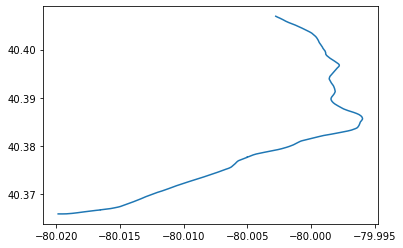

In [24]:
#abrindo um dado de GPS escolhido arbitráriamente
GPS=pd.DataFrame(read_mat(path+df_global.arquivo[5485])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
plt.plot(GPS.Longitude,GPS.Latitude)

In [25]:
#dado de acelerômetro correspondente ao dado de GPS aberto
nomeacc = df_global.loc[(df_global['identidade'] == df_global.identidade[5485]) & (df_global['file'] == 26832), 'arquivo'].reset_index(drop=True)
dataacer = read_mat(path+nomeacc[0])
df_acc = pd.DataFrame(dataacer)
df_acc

,save_var
0,-0.045267
1,-0.030098
2,0.013356
3,0.024190
4,0.003554
...,...
749828,-0.042076
749829,0.008488
749830,-0.033466
749831,-0.065576


In [26]:
#criando uma matriz generalizada contendo GPS e Acc, sendo que os de GPS são posto a cada 1647 dados de acc e o resto é NaN.
df_concatenado = pd.DataFrame()
df_concatenado = pd.concat([GPS.iloc[:1, ], df_acc[:1647]], axis=1)
for i in range(1, int(len(df_acc)/1647)+1):
    df_concatenado = df_concatenado.append(pd.concat([GPS.iloc[i:i+1, ].reset_index(drop=True), df_acc[i*1647:(i+1)*1647].reset_index(drop=True)], axis=1)).reset_index(drop=True)

In [27]:
#Interpolando o df para substituir os NaN por valores interpolados.
df_concatenado = df_concatenado.interpolate(method ='linear', limit_direction ='forward')

Unindo todos os bancos de dados

In [38]:
df_global = df_global.reset_index(drop=True)
len(df_global)

1452

In [29]:
# for i in range(0, int(len(df_global)/10)):
#     if
np.where(df_global.accelerometer == -1)[0]

array([   0,   11,   17,   28,   39,   45,   51,   57,   63,   69,   75,
         81,   97,  118,  134,  145,  156,  166,  188,  199,  255,  261,
        267,  273,  279,  285,  291,  297,  303,  309,  315,  321,  327,
        333,  339,  345,  351,  357,  363,  369,  375,  381,  387,  393,
        399,  405,  411,  417,  423,  429,  435,  441,  447,  453,  459,
        465,  471,  477,  483,  489,  495,  501,  507,  513,  519,  525,
        531,  537,  543,  549,  555,  561,  567,  573,  579,  590,  601,
        612,  618,  624,  630,  641,  652,  658,  669,  680,  686,  697,
        708,  719,  730,  741,  752,  763,  774,  780,  786,  792,  798,
        804,  810,  816,  822,  828,  834,  840,  846,  852,  858,  864,
        870,  876,  882,  888,  894,  900,  906,  912,  918,  924,  930,
        936,  942,  948,  954,  960,  966,  972,  978,  984,  990,  996,
       1002, 1008, 1014, 1020, 1026, 1032, 1038, 1044, 1050, 1056, 1062,
       1068, 1074, 1080, 1086, 1092, 1098, 1104, 11

In [30]:
#Se os dados de gps/acelerômetro estiverem faltando, ou seja, não seguirem a ordem -1 1 2 3 4 5, o dado do conjunto será excluído
acc = -1
dropado = 1
for i in range(0, len(df_global)):
    if (df_global.accelerometer[i] == acc):
        if(acc == -1):
            acc = 1
        elif(acc == 5):
            acc = -1
        else:
            acc+=1
    else:
        if (acc != -1):
            for j in range(0,acc):
                df_global.drop(i-j-1,  inplace=True)
        df_global.drop(i,  inplace=True)
        acc = -1

In [33]:
df_global = df_global.reset_index(drop=True)

Os acererômetros do dia 20150618, 20160421, 20160505, 20160519, 20150625, 20150924, 20151022, 20151029, 20151105, 20150818 não têm arquivo gps associado:

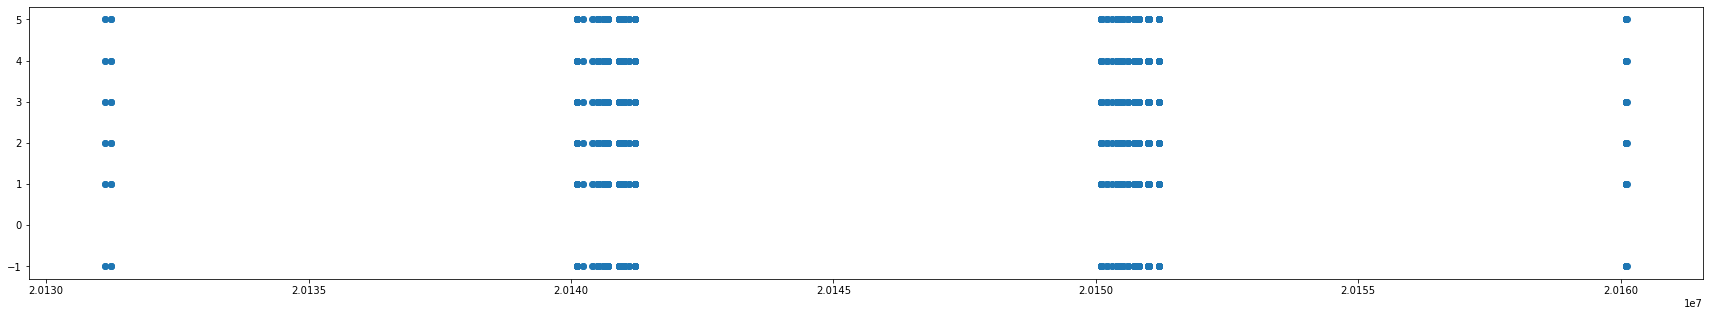

In [34]:
plt.figure(figsize=[30,5])
plt.scatter(df_global.date,df_global.accelerometer)
#plt.xlim(20131121,20160121)

In [35]:
aux.loc[(aux.accelerometer != -1) &(aux.accelerometer != 1) & (aux.accelerometer != 2) & (aux.accelerometer != 3) & (aux.accelerometer != 4) & (aux.accelerometer != 5)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade


In [36]:
aux[80:100]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
80,LRV4306,10356,20140911,5,1,5,1,-1,LRV4306\gps_data\10356_20140911_5_1_5_1gps.mat,20140911_5_1_5_1
81,LRV4306,10421,20140911,5,2,5,1,-1,LRV4306\gps_data\10421_20140911_5_2_5_1gps.mat,20140911_5_2_5_1
82,LRV4306,10486,20140911,5,3,5,1,-1,LRV4306\gps_data\10486_20140911_5_3_5_1gps.mat,20140911_5_3_5_1
83,LRV4306,10631,20140918,2,1,5,1,-1,LRV4306\gps_data\10631_20140918_2_1_5_1gps.mat,20140918_2_1_5_1
84,LRV4306,10686,20140918,2,2,5,1,-1,LRV4306\gps_data\10686_20140918_2_2_5_1gps.mat,20140918_2_2_5_1
85,LRV4306,10746,20140918,8,1,5,1,-1,LRV4306\gps_data\10746_20140918_8_1_5_1gps.mat,20140918_8_1_5_1
86,LRV4306,10806,20140918,8,2,5,1,-1,LRV4306\gps_data\10806_20140918_8_2_5_1gps.mat,20140918_8_2_5_1
87,LRV4306,10876,20140918,9,1,5,1,-1,LRV4306\gps_data\10876_20140918_9_1_5_1gps.mat,20140918_9_1_5_1
88,LRV4306,10956,20140918,9,2,5,1,-1,LRV4306\gps_data\10956_20140918_9_2_5_1gps.mat,20140918_9_2_5_1
89,LRV4306,11026,20140918,9,3,5,1,-1,LRV4306\gps_data\11026_20140918_9_3_5_1gps.mat,20140918_9_3_5_1


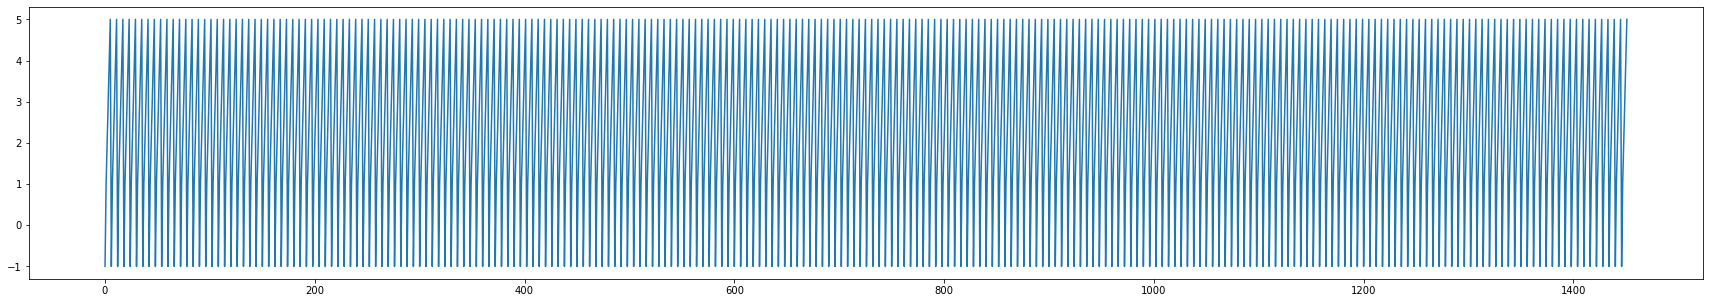

In [39]:
plt.figure(figsize=[30,5])
plt.plot(df_global.index,df_global.accelerometer)
#plt.xlim(90,200)

Ainda não funcionando: 

In [44]:
aux = df_global
#for i in range(0, len(aux.index),6):
for i in range(0, 180,6):
    id=aux.identidade[i]
    file=aux.file[i]
    df_gps = pd.DataFrame(read_mat(path+aux.arquivo[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
    df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+1])['save_var'],  columns=['acc'+str(aux.accelerometer[i+1])])
    jump=int(len(df_acc)/len(df_gps))
    df_concatenado = pd.DataFrame()
    df_concatenado = pd.concat([df_gps.iloc[:1, ], df_acc[:jump]], axis=1)
    for j in range(1, int(len(df_gps)+1)):
        df_concatenado = df_concatenado.append(pd.concat([df_gps.iloc[j:j+1, ].reset_index(drop=True), df_acc[j*jump:(j+1)*jump].reset_index(drop=True)], axis=1)).reset_index(drop=True)

    df_concatenado = pd.concat([df_concatenado, df_acc], axis=1)
    for k in range(2,6):
        df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+k])['save_var'],  columns=['acc'+str(aux.accelerometer[i+k])])
        df_concatenado=pd.concat([df_concatenado, df_acc], axis=1)
    
    df_concatenado = df_concatenado.interpolate(method ='linear', limit_direction ='forward')
    if i==0:
        df_final = df_concatenado
    else:
        df_final = pd.concat([df_final, df_concatenado], axis=0)

In [ ]:
# i=0
# aux = df_global
# id=aux.identidade[i]
# file=aux.file[i]
# df_gps = pd.DataFrame(read_mat(path+aux.arquivo[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
# df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+1])['save_var'],  columns=['acc'+str(aux.accelerometer[i+1])])
# jump=int(len(df_acc)/len(df_gps))
# df_concatenado = pd.DataFrame()
# df_concatenado = pd.concat([df_gps.iloc[:1, ], df_acc[:jump]], axis=1)
# for j in range(1, int(len(df_gps)+1)):
#     df_concatenado = df_concatenado.append(pd.concat([df_gps.iloc[j:j+1, ].reset_index(drop=True), df_acc[j*jump:(j+1)*jump].reset_index(drop=True)], axis=1)).reset_index(drop=True)
# if i==0:
#     df_final = df_concatenado
# for k in range(2,6):
#     df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+k])['save_var'],  columns=['acc'+str(aux.accelerometer[i+k])])
#     df_final=pd.concat([df_final, df_acc], axis=1)

In [ ]:
# aux = df_global
# for i in range(0, 12,6):
#     id=aux.identidade[i]
#     file=aux.file[i]
#     df_gps = pd.DataFrame(read_mat(path+aux.arquivo[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
#     df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+1])['save_var'],  columns=['acc'+str(aux.accelerometer[i+1])])
#     jump=int(len(df_acc)/len(df_gps))
#     df_concatenado = pd.DataFrame()
#     df_concatenado = pd.concat([df_gps.iloc[:1, ], df_acc[:jump]], axis=1)
#     for j in range(1, int(len(df_gps)+1)):
#         df_concatenado = df_concatenado.append(pd.concat([df_gps.iloc[j:j+1, ].reset_index(drop=True), df_acc[j*jump:(j+1)*jump].reset_index(drop=True)], axis=1)).reset_index(drop=True)

#     df_concatenado = pd.concat([df_concatenado, df_acc], axis=1)
#     for k in range(2,6):
#         df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+k])['save_var'],  columns=['acc'+str(aux.accelerometer[i+k])])
#         df_concatenado=pd.concat([df_concatenado, df_acc], axis=1)
    
#     df_concatenado = df_concatenado.interpolate(method ='linear', limit_direction ='forward')
#     if i==0:
#         df_final = df_concatenado
#     else:
#         df_final = pd.concat([df_final, df_concatenado], axis=0)

In [45]:
df_final #= df_final.interpolate(method ='linear', limit_direction ='forward')

,Longitude,Latitude,Altitude,Velocity,Time_Stamp,acc1,acc1,acc2,acc3,acc4,acc5
0,-80.00290,40.40698,291.500000,48.400000,735553.902199,-0.064275,-0.064275,-0.061946,0.313770,0.123806,0.242571
1,-80.00290,40.40698,291.500546,48.401942,735553.902199,0.143293,0.143293,0.040715,0.123914,0.214574,0.226497
2,-80.00290,40.40698,291.501092,48.403883,735553.902199,0.230718,0.230718,0.100938,0.009619,0.245727,0.184736
3,-80.00290,40.40698,291.501638,48.405825,735553.902199,0.007413,0.007413,0.137472,0.170537,0.264541,0.145984
4,-80.00290,40.40698,291.502184,48.407767,735553.902199,-0.117957,-0.117957,0.001192,0.132229,0.255051,0.162821
...,...,...,...,...,...,...,...,...,...,...,...
822499,-80.01995,40.36563,323.400000,43.700000,735740.725521,-0.455083,-0.455083,1.292953,-0.860884,-0.030939,0.071293
822500,-80.01995,40.36563,323.400000,43.700000,735740.725521,0.006830,0.006830,0.223103,-0.793072,0.018161,0.050617
822501,-80.01995,40.36563,323.400000,43.700000,735740.725521,0.370021,0.370021,-0.707778,-0.821256,0.034424,0.083346
822502,-80.01995,40.36563,323.400000,43.700000,735740.725521,-0.241027,-0.241027,-0.269136,-0.644905,0.029304,0.168277


In [ ]:
plt.plot(df_final.Longitude, df_final.Latitude)